<!-- <img width="800px" src="../fidle/img/header.svg"></img>  -->

# <!-- TITLE --> Kernal Ridge Regression (KRR)

## 1. Load packages

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [25]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## 2. Load the data

In [26]:
# If you use google colaboratory, it is necessary to set the followings
import urllib.request

file_url = 'https://raw.githubusercontent.com//xxu2018//Hand-on-unbox-ML//master//income_data.csv'

file_name = 'income_data.csv'

from google.colab import drive
# # Mount Google Drive
drive.mount('/content/drive')

urllib.request.urlretrieve(file_url, file_name)
df = pd.read_csv(file_name)

# Display the DataFrame
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Education_Level,Years_of_Experience,Industry,Location,Working_Hours_per_Week,Marital_Status,Job_Role_Level,Income
0,56,3,16,1,3,36,1,2,85897.698551
1,69,3,49,3,3,54,1,4,130573.123694
2,46,3,39,1,4,56,2,3,112050.218306
3,32,4,44,4,5,38,1,3,98335.610808
4,60,1,31,3,5,48,2,2,78576.589807


 It is a synthetic dataset of income ($) in Texas in the US (2024), it includes 1000 rows with continuous and categorical variables. Here’s an outline for features we might consider:

- Age: Continuous, ranging from 18 to 70.
- Education Level: Ordinal, represented as integers (e.g., 1 = High School, 2 = Bachelor’s, 3 = Master’s, 4 = PhD).
- Years of Experience: Continuous, ranging from 0 to 50.
- Industry: Categorical, represented as integers (e.g., 1 = Tech, 2 = Finance, 3 = Healthcare, etc.).
- Location: Categorical, with levels representing different regions or cities.
- Working Hours per Week: Continuous, from 20 to 60 hours.
- Marital Status: Binary or categorical (e.g., 1 = Single, 2 = Married).
- Job Role Level: Ordinal, representing career progression (e.g., 1 = Entry, 2 = Mid, 3 = Senior, 4 = Executive).

## 3. Preprocess the data

In [27]:
# Define features and target
X = df.drop("Income", axis=1)
y = df["Income"]

# Split the data into training and testing sets
X_train0, X_test0, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data, then transform both train and test data
X_train = scaler.fit_transform(X_train0)
X_test = scaler.transform(X_test0)

## 4. Train a KRR model

In [28]:
# Initialize Kernel Ridge Regression model with RBF kernel
# https://scikit-learn.org/dev/modules/generated/sklearn.metrics.pairwise.pairwise_kernels.html#sklearn.metrics.pairwise.pairwise_kernels
krr = KernelRidge(kernel="polynomial", alpha=1.0, degree=2, gamma=1.0)

# Perform cross-validation
cv_scores = cross_val_score(krr, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_rmse = np.sqrt(-cv_scores.mean())  # Calculate root mean squared error for cross-validation

# Train the model on the training data
krr.fit(X_train, y_train)
y_pred_train = krr.predict(X_train)

# Make predictions on the test set and calculate test RMSE
y_pred_test = krr.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Test over a new input data point for prediction
new_data_X = np.array([[30, 3, 10, 2, 1, 40, 1, 2]])
new_data_y = 78000

# Scale the new_data_X features
new_data_scaled = scaler.transform(new_data_X)

# Predict income using the trained krr model
new_prediction = krr.predict(new_data_scaled)

# Display results
print(f"Cross-Validation RMSE: {cv_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Predicted value for new data point: {int(new_prediction[0])} $")
print(f"True value for the new data point : {new_data_y} $")

Cross-Validation RMSE: 5097.19
Test RMSE: 4816.05
Predicted value for new data point: 76158 $
True value for the new data point : 78000 $


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 5. Plot the results

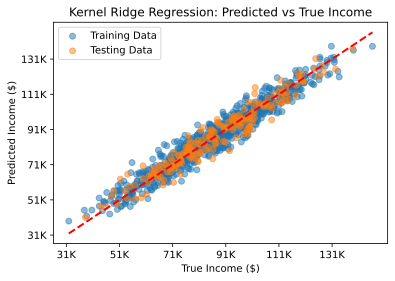

In [29]:
# Plotting y_train vs y_pred_train and y_test vs y_pred_test
plt.figure(figsize=(6, 4))

# Plot training and testing data predictions
plt.scatter(y_train / 1000, y_pred_train / 1000, color="C0", alpha=0.5, label="Training Data")
plt.scatter(y_test / 1000, y_pred_test / 1000, color="C1", alpha=0.5, label="Testing Data")

# Perfect prediction line
plt.plot([y.min() / 1000, y.max() / 1000], [y.min() / 1000, y.max() / 1000], 'r--', lw=2)

# Labels and title
plt.xlabel("True Income ($)")
plt.ylabel("Predicted Income ($)")
plt.title("Kernel Ridge Regression: Predicted vs True Income")
plt.legend()

# Set x and y ticks to show values in thousands with 'K' suffix
plt.xticks(ticks=np.arange(int(y.min() / 1000), int(y.max() / 1000) + 1, 20))
plt.yticks(ticks=np.arange(int(y.min() / 1000), int(y.max() / 1000) + 1, 20))
plt.gca().set_xticklabels([f"{int(x)}K" for x in plt.gca().get_xticks()])
plt.gca().set_yticklabels([f"{int(y)}K" for y in plt.gca().get_yticks()])

plt.show()

## 6. Optimize the KRR model

In [30]:
# Define the model with a polynomial kernel
krr_poly = KernelRidge(kernel="polynomial")

# Define the parameter grid
param_grid = {
    "alpha": [0.1, 1, 10],
    "degree": [2, 3, 4],
    "coef0": [1, 2, 3],
    "gamma": [0.1, 0.5, 1.0]
}

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(krr_poly, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

# Best parameters from the grid search
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Train the model with the best parameters on the entire training set
best_krr = KernelRidge(kernel="polynomial", **best_params)
best_krr.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_test_poly = best_krr.predict(X_test)
test_rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_test_poly))

print("Test RMSE with polynomial kernel:", test_rmse_poly)

Best parameters: {'alpha': 10, 'coef0': 3, 'degree': 2, 'gamma': 0.1}
Test RMSE with polynomial kernel: 4762.540225437424


In [31]:
# Predict income using the best trained model
new_prediction = best_krr.predict(new_data_scaled)

print(f"Predicted value for new data point: {int(new_prediction[0])} $")
print(f"True value for the new data point : {new_data_y} $")

Predicted value for new data point: 76722 $
True value for the new data point : 78000 $


## 7. Save and reload the best KRR model

In [32]:
# load the pickle package to save the model
import pickle

In [33]:
# save model
fn = "./krr_model.pkl"
with open(fn,'wb') as f:
    pickle.dump(best_krr, f)
print("Saved the model")

Saved the model


In [34]:
## load model
with open(fn, 'rb') as f:
  model = pickle.load(f)

## 8. Prediction using Numpy (To understand how the prediction works)

In [35]:
# Extract the dual coefficients (alpha values)
alpha_values = model.dual_coef_ if hasattr(model, 'dual_coef_') else model.dual_coef_
X_train = model.X_fit_ if hasattr(model, 'X_fit_') else model.X_fit_

# Save alpha to alpha_values.txt
np.savetxt("alpha_values.txt", alpha_values, fmt="%.6f", header="alpha_values")

# Save X_train to X_train.txt
np.savetxt("X_train.txt", X_train, fmt="%.6f", header="X_train")

In [36]:
# Load X_train and alpha_values
X_train = np.loadtxt("X_train.txt")
alpha_values = np.loadtxt("alpha_values.txt")

# Define the polynomial kernel function
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.polynomial_kernel.html

# Best KRR parameters: {'coef0': 3, 'degree': 2, 'gamma': 0.1}
# Define the polynomial kernel function with gamma, coef0, and degree
def polynomial_kernel(X1, X2, degree=2, gamma=0.1, coef0=3):
    return (gamma * np.dot(X1, X2.T) + coef0) ** degree

def krr_prediction(K_test_train, alpha):
  return np.dot(K_test_train, alpha)

# Calculate the kernel matrix between test_x and X_train
Kernel_mat = polynomial_kernel(new_data_scaled, X_train, degree=2, gamma=0.1, coef0=3)

# Test the previous prediction new_prediction before saving and reloading the best model
new_y_pred = krr_prediction(Kernel_mat, alpha_values)
print(f"Predicted value from KRR model saved  [sklearn]: {int(new_prediction[0])} $")
print(f"Predicted value from reloaded KRR model [numpy]: {int(new_y_pred[0])} $")

Predicted value from KRR model saved  [sklearn]: 76722 $
Predicted value from reloaded KRR model [numpy]: 76722 $
